## Import neccesary libraries

In [37]:
#Import neccessary libraries
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None)

# Load data

In [38]:
#read the data
df = pd.read_csv('train.csv')
#print top5 records
df.head()

,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa


In [3]:
#Remove the null values
df = df[pd.notnull(df['content'])]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23268 entries, 0 to 23267
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        23268 non-null  object
 1   content   23268 non-null  object
 2   category  23268 non-null  object
dtypes: object(3)
memory usage: 727.1+ KB


In [5]:
df.columns

Index(['id', 'content', 'category'], dtype='object')

In [6]:
df

,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa
...,...,...,...
23263,SW24920,Alitoa pongezi hizo alipozindua rasmi hatua y...,uchumi
23264,SW4038,Na NORA DAMIAN-DAR ES SALAAM TEKLA (si jina ...,kitaifa
23265,SW16649,"Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...",uchumi
23266,SW23291,"MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...",michezo


In [8]:
#encode the category column and save as category_id
df['category_id'] = df['category'].factorize()[0]
#drop duplicates and sort by category_id
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
#convert to a dictionary
category_to_id = dict(category_id_df.values)
#reverse the dictionary
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [12]:
#Check the new data frame
df.head()

,id,content,category,category_id
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi,0
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa,1
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi,0
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo,2
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa,1


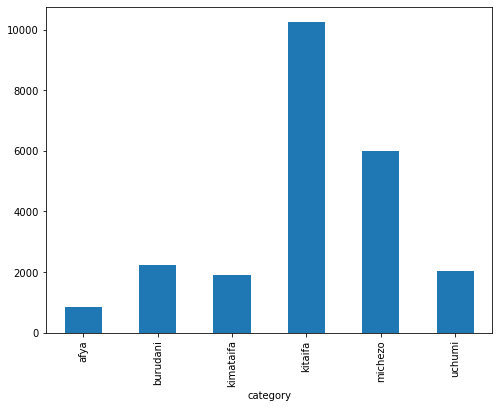

In [15]:
#Plot the news categories
fig = plt.figure(figsize=(8,6))
df.groupby('category').content.count().plot.bar(ylim=0)
plt.show()

In [35]:
#Convert a collection news content to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 1))

features = tfidf.fit_transform(df.content).toarray()
labels = df.category_id
features.shape

(23268, 42465)

# Check for correlated features to each class

In [36]:
#The features that are the most likely to be independent of class and therefore irrelevant for classification.
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#   bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
#   print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'afya':
  . Most correlated unigrams:
       . bwaya
       . wagonjwa
# 'burudani':
  . Most correlated unigrams:
       . muziki
       . msanii
# 'kimataifa':
  . Most correlated unigrams:
       . iran
       . trump
# 'kitaifa':
  . Most correlated unigrams:
       . mchezo
       . timu
# 'michezo':
  . Most correlated unigrams:
       . mchezo
       . timu
# 'uchumi':
  . Most correlated unigrams:
       . wafanyabiashara
       . kodi


# Build the model

In [56]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB

# X_train, X_test, y_train, y_test = train_test_split(df['content'], df['category'], random_state = 0)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [57]:
# clf

MultinomialNB()

In [58]:
# print(clf.predict(count_vect.transform(["Bodi ya Utalii Tanzania (TTB) imesema, itafanya misafara ya kutangaza utalii kwenye miji minne nchini China kati ya Juni 19 hadi Juni 26 mwaka huu.Misafara hiyo itatembelea "])))

['kitaifa']


In [59]:
# df.content[1]

' PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ametangaza kuwafukuza\nkazi wakurugenzi wote wa halmashauri ambao watabainika kukiuka sheria ya\nufutaji wa tozo za ushuru wa mazao. Alisema baada ya kuingia madarakani, Serikali\niliondoa tozo 80, miongoni mwa hizo tozo ushuru wakulima ambao walikuwa\nwakilipa mazao kutoka halmashauri moja kwenda nyingine. Rais Dk. Magufuli, aliyasema hayo juzi alipokuwa\nakiwahutubia wakazi wa Wilaya ya Kyela katika ziara ya kikazi ya siku 10 mkoani\nMbeya. Alisema, sheria ya ufutaji wa tozo hizo\nzilipitishwa na Bunge hivyo hakuna mtu yoyote wa kuitengua na kwamba Mkurugenzi\natakaye itengua atakuwa umevunja sheria na anawajibu wa kufukuzwa kazi. Alisema licha ya kupitishwa kwa sheria hiyo wapo\nbaadhi ya watendaji wameendelea kuwatoza ushuru wananchi kwa kisingizio cha\nkupandisha ukusanyaji wa mapato hilo jambo sitaki kulisikia. “Wapo watendaji\nwanasema kufutwa kwa ushuru kunapunguza mapato, narudia kwa viongozi wote, wakurugenzi,\nwatendaji wote wa 

In [60]:
print(clf.predict(count_vect.transform([df.content[1]])))

['kitaifa']


In [61]:
print(clf.predict(count_vect.transform([df.content[2]])))

['kitaifa']


In [62]:
print(clf.predict(count_vect.transform([df.content[3]])))

['michezo']


In [63]:
print(clf.predict(count_vect.transform([df.content[4]])))

['kitaifa']


In [64]:
print(clf.predict(count_vect.transform([df.content[5]])))

['kitaifa']


In [65]:
print(clf.predict(count_vect.transform([df.content[6]])))

['kitaifa']


In [66]:
print(clf.predict(count_vect.transform([df.content[7]])))

['michezo']


In [67]:
print(clf.predict(count_vect.transform([df.content[8]])))

['kitaifa']


In [68]:
print(clf.predict(count_vect.transform([df.content[9]])))

['kitaifa']


In [69]:
print(clf.predict(count_vect.transform([df.content[10]])))

['kitaifa']


In [70]:
df.content[10]

'STOCKHOLM, SWEDEN SERIKALI ya Sweden\nimemrudisha nyumbani balozi wake nchini China kuhusiana na kuhusika kwake\nkatika mkutano wenye utata uliohusisha binti wa muuza vitabu mwenye asili ya\nmataifa hayo mawili, ambaye anashikiliwa na China. Balozi Anna\nLindstedt, aliondoka Beijing juzi, msemaji wa wizara ya mambo ya nje wa Sweden\nalisema. Tukio lilianza\nkwa Angela Gui, ambaye baba yake, Gui Minhai anaaminika kutekwa na makachero wa\nChina mwaka 2015, kuandika kwenye mtandao wa jamii kuhusu mkutano huo na\nLindstedt. Gui alikuwa mmoja\nwa wauza vitabu watano wa Hong Kong waliokamatwa. Vitabu wanavyouza vimekuwa\nvikiikosoa vikali China. Gui, ambaye\nalisomea shahada ya uzamivu katika Chuo Kikuu cha Cambridge \xa0Uingereza, amekuwa akiendesha kampeni mitandaoni\nya kutaka kuachiwa kwa baba yake. Mwezi uliopita, Lindstedt\nalikaribishwa katika mkutano na kundi la wafanyabiashara wa China waliodai kuwa\nna ukaribu na Chama cha Kikomunisti cha China. Gui alisema watu\nhao walimshinikiz

In [71]:
df[df['content'] == "STOCKHOLM, SWEDEN SERIKALI ya Sweden\nimemrudisha nyumbani balozi wake nchini China kuhusiana na kuhusika kwake\nkatika mkutano wenye utata uliohusisha binti wa muuza vitabu mwenye asili ya\nmataifa hayo mawili, ambaye anashikiliwa na China. Balozi Anna\nLindstedt, aliondoka Beijing juzi, msemaji wa wizara ya mambo ya nje wa Sweden\nalisema. Tukio lilianza\nkwa Angela Gui, ambaye baba yake, Gui Minhai anaaminika kutekwa na makachero wa\nChina mwaka 2015, kuandika kwenye mtandao wa jamii kuhusu mkutano huo na\nLindstedt. Gui alikuwa mmoja\nwa wauza vitabu watano wa Hong Kong waliokamatwa. Vitabu wanavyouza vimekuwa\nvikiikosoa vikali China. Gui, ambaye\nalisomea shahada ya uzamivu katika Chuo Kikuu cha Cambridge \xa0Uingereza, amekuwa akiendesha kampeni mitandaoni\nya kutaka kuachiwa kwa baba yake. Mwezi uliopita, Lindstedt\nalikaribishwa katika mkutano na kundi la wafanyabiashara wa China waliodai kuwa\nna ukaribu na Chama cha Kikomunisti cha China. Gui alisema watu\nhao walimshinikiza akubali kuingia makubaliano \xa0ambayo yatamfanya aache kuzungumza hadharani\nkuhusu kesi ya baba yake na kumuahidi angetumikia kifungo cha miaka mitano na \xa0\xa0kuachiwa. Wizara ya Mambo\nya Nje ya Sweden ilisema haikupewa taarifa za kuwapo mkutano huo uliohudhuriwa\nna Lindstedt, ambaye kwa sasa anakabiliwa na uchunguzi wa ndani. Kwa mujibu wa Gui,\nLindstedt aliwasiliana naye na kusema kuna mbinu mpya kuhusu kesi ya baba yake\nna kumtaka ahudhurie mkutano na wafanyabiashara hao mjini Stockholm,” Gui aliandika\nmtandaoni. Akapanda ndege\nkuelekea Stockholm na kufikia katika hoteli waliyopanga kukutana, ambako alipelekwa\nkwenye ukumbi alikoonana na watu hao. “Kulikuwa na\nvinywaji vingi vya kulevya na maswali mengi ya ajabu ajabu,” Gui aliandika. “Lakini kwa\nsababu Balozi Lindstedt alikuwapo na alionekana kuridhika na kila kinachoendelea,\nnikadhani ni mkutano ulioandaliwa na wizara ya mambo ya nje ya Sweden.” Anasema mmoja wa\nwafanyabiashara alimpa ofa ya kufikia makubaliano \xa0ambayo baba yake angeenda mahakamani na\nkufungwa jela miaka michache ili binti aache kuandika hadharani kuhusu\nkushikiliwa kwa baba yake. Kwa mujibu ya\nmaelezo ya Gui, Lindstedt alionekana kuunga mkono mpango huo, akimwambia kuwa China\ninaanzisha mpango mpya wa \xa0diplomasia na\niwapo ataendelea kutoa matamko mitandaoni China inaweza kuiadhibu Sweden."]

,id,content,category,category_id
10,SW9898,"STOCKHOLM, SWEDEN SERIKALI ya Sweden\nimemrudi...",kimataifa,3


In [72]:
df[df['content']==df.content[9]]

,id,content,category,category_id
9,SW9193,"RAIS wa Zanzibar, Dk Ali Mohamed Shein amewat...",kitaifa,1


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC

# from sklearn.model_selection import cross_val_score


# models = [
#     RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#   model_name = model.__class__.__name__
#   accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
# import seaborn as sns

# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()

In [ ]:
# cv_df.groupby('model_name').accuracy.mean()

In [73]:
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
print(model.predict(tfidf.transform([df.content[8]])))

[0]


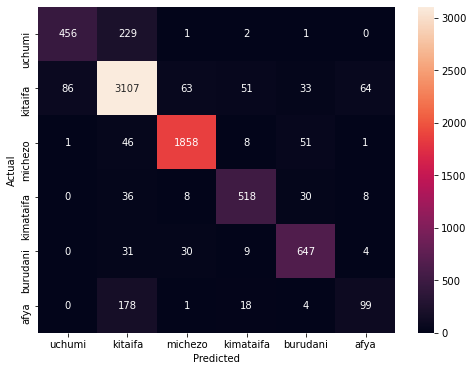

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [75]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['category', 'content']])
      print('')

'kitaifa' predicted as 'uchumi' : 86 examples.


,category,content
516,kitaifa,MAMLAKA ya Mapato Tanzania (TRA) imekanusha h...
13568,kitaifa,KIWANDA cha kukausha matunda na viungo cha ka...
9314,kitaifa,"FLORENCE SANAWA, LINDI Shirika la viwango Tanz..."
4027,kitaifa,WAFANYA BIASHARA wengi mkoani Tabora hawajili...
10287,kitaifa,RWANDA imepata kiwanda cha kwanza kuchakata d...
...,...,...
15524,kitaifa,"BEATRICE MOSSES, MANYARA Mkuu wa mkoa wa Manya..."
17196,kitaifa,Na GUSTAPHU HAULE-PWANI MKUU wa Mkoa wa Pwani...
16828,kitaifa,"LEO Waziri wa Madini, Angela Kairuki ataongoz..."
4389,kitaifa,"OFISA Afya wa Jiji la Dodoma, James Yana amew..."



'uchumi' predicted as 'kitaifa' : 229 examples.


,category,content
14909,uchumi,Rai hiyo ilitolewa jana na Mkuu wa Mkoa wa Mo...
21690,uchumi,Aliongeza kuwa mbali ya kutekeleza dhamira hi...
20148,uchumi,"WAFANYABIASHARA 14 kutoka mikoa ya Arusha, Ta..."
7487,uchumi,Serikali inaendelea kupambana kuhakikisha kwa...
3089,uchumi,"Aidha, Rais mstaafu wa awamu ya tatu, Benjami..."
...,...,...
10201,uchumi,Kauli hiyo ilitolewa na Waziri wa Maliasili n...
20326,uchumi,WAKULIMA 17 wa mashamba ya miwa wilayani Kilo...
18152,uchumi,Imeelezwa kwamba serikali itakapokamilisha tr...
12376,uchumi,"Waziri Mkuu, Kassim Majaliwa amesema, Mkoa wa..."



'michezo' predicted as 'kitaifa' : 46 examples.


,category,content
14155,michezo,Na FREDY AZZAH-DODOMA SERIKALI imetoa sababu t...
20528,michezo,Bakari Kimwanga – Aliyekuwa Thailand TANZANIA ...
11740,michezo,Lulu aliye nje kwa dhamana atapanda kizimbani...
18527,michezo,Juzi gari aina ya Toyota Land Cruiser VX 8 ye...
4022,michezo,"Kutokana na hali hiyo, Waziri Nape ameagiza k..."
9059,michezo,Na WINFRIDA NGONYANI-DAR ES SALAAM KAIMU Katib...
10054,michezo,"Akizungumza jana jijini Dar es Salaam, Snura ..."
17515,michezo,"Akizungumza na watalaamu kutoka Morocco, mjin..."
5808,michezo,Bodi ya Michezo ya Kubahatisha nchini (GBT) n...
20231,michezo,"['', 'Serikali ya Kenya imefuta kwa muda viba..."



'kimataifa' predicted as 'kitaifa' : 36 examples.


,category,content
9162,kimataifa,"KAMPALA, UGANDA TUME ya Mawasiliano Uganda (U..."
21761,kimataifa,"MBUNGE wa Singida Mashariki, Tundu Lissu (Chad..."
19545,kimataifa,Raia wa Kenya Glenn Chibasellow Ooko anashiki...
12066,kimataifa,"NAIROBI, KENYA MBUNGE mwanamke wa Kenya ameto..."
14785,kimataifa,Na Brighiter Masaki Mashindano ya kimataifa ya...
11614,kimataifa,Na Leah Mushi- GMT – Tanzania MWANAHARAKATI w...
8035,kimataifa,"Anna Potinus Rais wa Uganda Yoweri Museveni, ..."
19214,kimataifa,Serikali ya Venezuela imetangaza kupunguza mas...
13253,kimataifa,MWANDISHI WETU -DAR ES SALAAM WAZIRI wa Mambo...
3645,kimataifa,BAADHI ya familia kutokana na uwezo walio nao ...



'burudani' predicted as 'kitaifa' : 31 examples.


,category,content
13619,burudani,"Festo Polea, Zanzibar Mwenyekiti wa Bodi ya B..."
6114,burudani,\n\n \n\tNa RAMADHANI MASENGA\n \n\tNIAJE wana...
21378,burudani,NA MWANDISHI WETU WAZIRI wa Maliasili na Utali...
2509,burudani,"Arodia Peter, Dodoma Mbunge wa\nGeita Vijijini..."
6665,burudani,NA KULWA MZEE -DAR ES SALAAM SIKU mbili kabla...
1295,burudani,Na KULWA MZEE DAR ES SALAAM MSHEREHESHAJI\nEmm...
33,burudani,Brighiter Masaki – Dar es Salaam Miss Tanzania...
10607,burudani,"Na, Mwandishi Wetu.Kampuni ya michezo ya kubah..."
17386,burudani,NA FESTO POLEA MTANZANIA mzaliwa wa Mkoa wa Ir...
7628,burudani,Na MWANDISHI WETU-DAR ES SALAAM MSANII wa muz...



'afya' predicted as 'kitaifa' : 178 examples.


,category,content
7027,afya,"Na SALUM VUAI,ZANZIBAR WAZIRI wa Kazi, Uwezes..."
3173,afya,"Aveline Kitomary, Dar es Salaam Maabara ya Mke..."
7222,afya,Nyemo Malecela-Bukoba WANAKIJIJI wenye hasira ...
13367,afya,"Mwandishi Wetu, Dar es Salaam Waimba kwaya wa ..."
17891,afya,MWANDISHI WETU – DODOMA ...
...,...,...
21146,afya,Mwandishi wetu -Dar es salaam KAMPUNI inayoon...
16421,afya,Na TUNU NASSOR -DAR ES SALAAM JAMII imeombwa k...
2071,afya,Na VERONICA ROMWALD – DAR ES SALAAM SERIKALI ...
15272,afya,JANETH MUSHI-BABATI Chama cha Wafugaji Tanzani...



'kitaifa' predicted as 'michezo' : 63 examples.


,category,content
5682,kitaifa,MKUU wa mkoa wa Dar es Salama ametangaza kuwa...
4890,kitaifa,Anna Potinus – Dar es salaam Mfanyabiashara m...
882,kitaifa,"Bethsheba Wambura Rais wa Kenya, Uhuru Kenyat..."
9308,kitaifa,Na JENNIFER ULLEMBO-DAR ES SALAAM MSHAMBULIAJ...
18608,kitaifa,MUHADJIRI Hakizimana ndiye mchezaji bora wa m...
...,...,...
7446,kitaifa,TAMASHA la Pasaka lililopangwa kufanyika Chuo...
3498,kitaifa,MAKAMU wa rais wa zamani wa Shirikisho la sok...
5991,kitaifa,"BAADA ya wiki iliyopita timu ya taifa, Taifa ..."
20085,kitaifa,"KOCHA wa timu ya Azam FC, Mholanzi Hans van P..."



'kimataifa' predicted as 'michezo' : 8 examples.


,category,content
19800,kimataifa,"MABINGWA wa Ligi Kuu nchini England, Chelsea, ..."
19808,kimataifa,Moyo wa binadamu uliokuwa umepakiwa kwenye nd...
11809,kimataifa,"KIEV, UKRAINE MCHEZAJI bora duniani, Cristian..."
19978,kimataifa,MWANAMKE mmoja kutoka Umoja wa Falme za Kiara...
9746,kimataifa,"CAIRO, MISRI NAHODHA wa timu ya taifa ya Zimba..."
19481,kimataifa,NA LULU RINGO Mzani ‘umebalance’ michuano ya ...
15754,kimataifa,\n\n \n\tBAADA ya klabu ya Arsenal kushinda ma...
5749,kimataifa,"BARCELONA, HISPANIA HATIMAYE mshambuliaji hat..."



'burudani' predicted as 'michezo' : 30 examples.


,category,content
2462,burudani,THERESIA GASPER – DAR ES SALAAM KOCHA Mkuu wa ...
16202,burudani,"KWA kipindi kirefu sasa, mchezo wa riadha hap..."
130,burudani,"PARIS, UFARANSA BINGWA namba mbili kwa ubora ..."
5590,burudani,"GLORY MLAY LIGI Daraja la Kwanza(FDL), imezid..."
15537,burudani,.Waziri wa Habari Utamaduni Sanaa na Michezo D...
13777,burudani,Na ADAM MKWEPU-DAR ES SALAAM SHIRIKISHO la So...
7514,burudani,NA THERESIA GASPER -DAR ES SALAAM TIMU ya Yang...
11593,burudani,\n\n \n\tNA MARTIN MAZUGWA\n \n\tMOJA kati ya ...
3198,burudani,NA ELLY MHAGAMA (TUDARCO) WASANII wa fani mbal...
1523,burudani,"NA MWALI IBRAHIM, DAR ES SALAAM BENDI ya muzik..."



'kitaifa' predicted as 'kimataifa' : 51 examples.


,category,content
1624,kitaifa,JESHI la Kenya limebainisha kuwa limewaua mag...
6109,kitaifa,Waziri wa Mambo ya Ndani wa nchini Afrika Kus...
19696,kitaifa,BUNGE linaendelea leo na Mkutano wake wa 15 w...
6256,kitaifa,"NAIROBI, KENYA UNAWEZA kusema Rais Uhuru Keny..."
16361,kitaifa,Utafiti wa hivi karibuni uliofanywa na jarida...
12147,kitaifa,"MWILI wa Rais wa zamani wa Zimbabwe, Robert M..."
14031,kitaifa,IDADI ya watu waliokufa kwa athari za kimbung...
6807,kitaifa,"Rais wa Kenya, Uhuru Kenyatta amesema, magaid..."
19107,kitaifa,HISTORIA ya Madagascar yenye asili ya utawala...
20431,kitaifa,"SANTIAGO, CHILE ZAIDI ya watu milioni moja wa..."



'michezo' predicted as 'kimataifa' : 8 examples.


,category,content
7583,michezo,"MWANAMUZIKI maarufu wa Congo DR, Koffi Olomid..."
13194,michezo,Lionel Messi. Picha: Hisani Messi analalia go...
20258,michezo,"[""Floyd Mayweather amemwambia Manny Pacquiao k..."
2455,michezo,"Rais wa zamani wa Real Madrid ya Hispania, Lo..."
20781,michezo,"LONDON, ENGLAND MSHAMBULIAJI wa klabu ya Arse..."
20912,michezo,"ROME, Italia MKUU wa zamani wa kampuni ya kut..."
654,michezo,"PARIS, UFARANSA KIUNGO wa klabu ya Marseille y..."
2468,michezo,"NEW YORK, MAREKANI STAA wa muziki nchini Marek..."



'burudani' predicted as 'kimataifa' : 9 examples.


,category,content
17628,burudani,"New York, Marekani NYOTA wa muziki aliyetamba..."
15668,burudani,"NAIROBI, KENYA NYOTA wa muziki nchini Kenya, ..."
17440,burudani,"NEW YORK, MAREKANI DAKTARI bingwa wa upasuaji..."
11889,burudani,"KWA mujibu wa E! News, staa wa\nmitindo kutoka..."
17806,burudani,"NEW YORK, MAREKANI MAPEMA mwaka huu, msanii w..."
22901,burudani,"LOS ANGELES, MAREKANI KWA mujibu wa mtandao wa..."
10570,burudani,"LOS VEGAS, MAREKANI MWANAMITINDO maarufu nchi..."
20689,burudani,"STAA wa hip hop, Jay Z, ameachia video ya wimb..."
15885,burudani,"NEW YORK, MAREKANI STAA wa muziki wa RnB nchi..."



'afya' predicted as 'kimataifa' : 18 examples.


,category,content
16314,afya,"MWIGIZAJI mashuhuri wa Marekani,\nAngelina Jol..."
12192,afya,"Wuhan, CHINA TUME ya Afya ya China, imesema ma..."
7031,afya,Joseph Hiza na Mashirika IWAPO unajisikia kuc...
5323,afya,Na ELIYA MBONEA-ARUSHA TAASISI ya Utafiti wa ...
12209,afya,"LONDON, UINGEREZA Mwanaume mmoja kutoka London..."
639,afya,SURUA ni moja ya magonjwa ya kuambukiza yanayo...
10956,afya,*JOSEPH HIZA NCHI ya Norway inajivunia kuwa na...
11759,afya,Wanamazingira kutoka miji midogo ya pwani nch...
16773,afya,"RIO de Jeneiro,Brazil SHIRIKA la Utangazaji la..."
5954,afya,JOSEPH HIZA NA MTANDAO WANASAYANSI nchini Mar...



'kitaifa' predicted as 'burudani' : 33 examples.


,category,content
5153,kitaifa,"MSANII Agnes Gerald maarufu Masogange, anaye..."
9867,kitaifa,MWAKA 2019 ulikuwa mgumu kwa wasanii wa Bongo...
19753,kitaifa,MSANII Ommy Dimpoz amewazodoa waliomzushia ki...
15598,kitaifa,"Jeremiah Ernest, Dar es Salaam. Taratibu za ma..."
4057,kitaifa,"Na Brighiter Masaki MSANII wa filamu nchini, R..."
16611,kitaifa,"Na BEATRICE KAIZA MSANII\nwa filamu nchini, Sh..."
13506,kitaifa,Na CHRISTOPHER MSEKENA-DAR ES SALAAM MWANAMIT...
21256,kitaifa,"Msanii maarufu wa filamu, Elizabeth Michael m..."
1984,kitaifa,"WASANII wa muziki wa Bongo Fleva, Vanessa Mde..."
11752,kitaifa,"KUELEKEA siku ya ukimwi duniani, msanii maaru..."



'michezo' predicted as 'burudani' : 51 examples.


,category,content
21233,michezo,"MUIGIZAJI wa Bongo Movie, Wema Sepetu amesema..."
13549,michezo,Alisema shindano hilo limefanyika kwa miezi m...
7947,michezo,Hayo yalisemwa na Ofisa Mtendaji Mkuu wa Kamp...
15951,michezo,Msanii huyo ameshinda tuzo ya MTV Mama kwa mw...
17299,michezo,Msanii Salum Mohamed 'Sam wa Ukweli' amefarik...
1070,michezo,"MISS Tanzania 2019, Sylivia Sebastian ameting..."
13676,michezo,MUIGIZAJI wa Bongo movie Aunty Ezekiel amesem...
3064,michezo,"Awali, Basata ilifungia shindano hilo kutokan..."
10650,michezo,Msaani wa bongo fleva maarufu Afrika Diamond P...
14882,michezo,Akizugumza jana na waandishi wa habari wakati...



'kimataifa' predicted as 'burudani' : 30 examples.


,category,content
9093,kimataifa,"NEW YORK, MAREKANI STAA wa muziki na filamu nc..."
22034,kimataifa,BADI MCHOMOLO NA MITANDAO MTANZANIA linakulet...
3818,kimataifa,NA CHRISTOPHER MSEKENA HAKUNA msanii duniani a...
15410,kimataifa,"New York, Marekani STAA wa filamu nchini Mare..."
791,kimataifa,"NEW YORK, MAREKANI STAA wa muziki wa\nRnB nch..."
7433,kimataifa,"NEW YORK, MAREKANI NYOTA wa muziki wa hip hop..."
6648,kimataifa,"NEW YORK, MAREKANI RAPA\nOffset na mke wake C..."
7506,kimataifa,"CAPE\nTOWN, AFRIKA KUSINI MASHABIKI wa muziki ..."
8143,kimataifa,"New York, Marekani MTOTO wa staa wa muziki nch..."
11906,kimataifa,"NEW YORK, MAREKANI RAPA Kanye West, amesema k..."



'kitaifa' predicted as 'afya' : 64 examples.


,category,content
15051,kitaifa,AVELINE KITOMARY – DAR ES SALAAM SIKU chache\n...
21383,kitaifa,Aveline Kitomary -Dar es salaam RAIS Wa\nCham...
8701,kitaifa,"AVELINE KITOMARY, DAR ES SALAAM Meneja Mauzo w..."
7451,kitaifa,NA VERONICA ROMWALD – DAR ES SALAAM TAASISI ya...
7418,kitaifa,BENJAMIN MASESE-MWANZA SERIKALI imeombwa kupig...
...,...,...
18808,kitaifa,"Ofisa Lishe Mkoa wa Dar es Salaam, Janneth Mz..."
6143,kitaifa,"Amina Omari, Tanga Baraza la Waislamu Tanzania..."
7746,kitaifa,"Amina Omari,\nTanga Waziri\nwa Afya, Maendeleo..."
12620,kitaifa,"Na Andrew Msechu KILA uchao, historia inaende..."



'kimataifa' predicted as 'afya' : 8 examples.


,category,content
20758,kimataifa,"NA MWANDISHI WETU WANAWAKE walio njia panda, ..."
14278,kimataifa,\n\n \n\tWATAFITI kutoka Chuo Kikuu cha Queens...
15942,kimataifa,Na MWANDISHI WETU SERIKALI ina kila sababu ya...
20991,kimataifa,Mkurugenzi Mtendaji wa Shirika la Chakula Dun...
20380,kimataifa,"\n Mwandishi Wetu, New York Tanzania imetakiwa..."
13786,kimataifa,"Joseph Hiza na Mitandao MKAZI\nwa Boston, Mass..."
12831,kimataifa,Na ELIYA MBONEA-ARUSHA MAJERUHI watatu wa aja...
11083,kimataifa,"BALUCHISTAN, PAKISTAN WATU 30 wameuawa na we..."


In [78]:
model.fit(features, labels)

LinearSVC()

In [77]:
from sklearn.feature_selection import chi2

N = 2
for category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
#   bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(category))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
#   print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'afya':
  . Top unigrams:
       . kitomary
       . aveline
# 'burudani':
  . Top unigrams:
       . msanii
       . mrembo
# 'kimataifa':
  . Top unigrams:
       . nairobi
       . maofisa
# 'kitaifa':
  . Top unigrams:
       . magufuli
       . pichani
# 'michezo':
  . Top unigrams:
       . klabu
       . timu
# 'uchumi':
  . Top unigrams:
       . alisema
       . amesema


In [83]:
texts = ["Habari ya kutatanisha kinasema ya kwamba kuna mtu ameaga dunia.",
         "Timu ya Harambe Star yacheza na timu ya Tanzania",
         "Mwanafunzi aanguka kwenye darasa na akufa.",
         "Rais wa Marekani atembelea nchi ya Kenya na Tanzania",
         "Uchanguzi yafanyika nchi Uganda"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Habari ya kutatanisha kinasema ya kwamba kuna mtu ameaga dunia."
  - Predicted as: 'kimataifa'

"Timu ya Harambe Star yacheza na timu ya Tanzania"
  - Predicted as: 'michezo'

"Mwanafunzi aanguka kwenye darasa na akufa."
  - Predicted as: 'kitaifa'

"Rais wa Marekani atembelea nchi ya Kenya na Tanzania"
  - Predicted as: 'kimataifa'

"Uchanguzi yafanyika nchi Uganda"
  - Predicted as: 'kitaifa'



In [84]:
predictions

array([3, 2, 1, 3, 1], dtype=int64)

In [80]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['category'].unique()))

              precision    recall  f1-score   support

      uchumi       0.84      0.66      0.74       689
     kitaifa       0.86      0.91      0.88      3404
     michezo       0.95      0.95      0.95      1965
   kimataifa       0.85      0.86      0.86       600
    burudani       0.84      0.90      0.87       721
        afya       0.56      0.33      0.42       300

    accuracy                           0.87      7679
   macro avg       0.82      0.77      0.79      7679
weighted avg       0.87      0.87      0.87      7679



In [81]:
import joblib
joblib.dump(model, 'LSV_Swahili_model.pkl')

['LSV_Swahili_model.pkl']

In [82]:
LSV_Swahili_model = open('LSV_Swahili_model.pkl','rb')
model = joblib.load(LSV_Swahili_model)

In [ ]:
model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

nb = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
nb.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['category'].unique()))

In [ ]:
import joblib
joblib.dump(nb, 'nb_Swahili_model.pkl')

In [ ]:
nb_Swahili_model = open('nb_Swahili_model.pkl','rb')
model = joblib.load(nb_Swahili_model)

In [ ]:
model

# Test the app.py file

In [15]:
df = pd.read_csv('train.csv')
df = df[pd.notnull(df['content'])]
df['category_id'] = df['category'].factorize()[0]
from io import StringIO
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head()
# Extract Feature With CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 1))
# Features and Labels
features = tfidf.fit_transform(df.content).toarray()
labels = df.category_id
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf = MultinomialNB().fit(X_train, y_train)

In [16]:
id_to_category

{0: 'uchumi',
 1: 'kitaifa',
 2: 'michezo',
 3: 'kimataifa',
 4: 'burudani',
 5: 'afya'}

In [89]:
import joblib
joblib.dump(clf, 'nb1_Swahili_model.pkl')

['nb1_Swahili_model.pkl']

In [91]:
nb_Swahili_model = open('nb1_Swahili_model.pkl','rb')
# clf= joblib.load(nb_Swahili_model)

In [ ]:
message = ['Manchester United walishinda mchezo huo jana na kutinga nusu fainali.']

In [ ]:
data = message
vect = tfidf.transform(data).toarray()
my_prediction = clf.predict(vect)

In [ ]:
my_prediction

In [ ]:
id_to_category[my_prediction[0]]

In [ ]:
message = ['Trump hupoteza uchaguzi wake kwa Joe Biden.']

In [ ]:
data = message
vect = tfidf.transform(data).toarray()
my_prediction = clf.predict(vect)

In [ ]:
my_prediction

In [ ]:
id_to_category[my_prediction[0]]

In [ ]:
message = ['Rais wa Tanzania Pombe Magufuli afariki dunia.']

In [ ]:
data = message
vect = tfidf.transform(data).toarray()
my_prediction = clf.predict(vect)

In [ ]:
my_prediction

In [ ]:
my_prediction[0]

In [ ]:
id_to_category[my_prediction[0]]

In [ ]:
id_to_category[my_prediction[0]]

In [ ]:
import joblib
joblib.dump(clf, 'nb1_Swahili_model.pkl')

In [ ]:
nb_Swahili_model = open('nb_Swahili_model.pkl','rb')
model = joblib.load(nb_Swahili_model)

In [ ]:
model

In [ ]:
data = message
vect = tfidf.transform(data).toarray()
my_prediction = clf.predict(vect)

In [ ]:
id_to_category[my_prediction[0]]